Project Title- Amazon Delivery Time Prediction 
-----------------------------------------------

Project Goal-:
-----------------
                    To build a predictive system that estimates delivery times for Amazon orders using machine learning. The system helps optimize    logistics, improve customer satisfaction, and reduce operational delays.

 Key Components-:
---------------------
1. Data Collection & Preparation
   -----------------------------
   
Source:  Amazon delivery data (e.g., distance, traffic, weather, order time, actual delivery time).
--------
Features Used:
-------------

Distance (in km)

Traffic level (Low, Medium, High)

Weather condition (Clear, Rainy, Stormy, Snowy)

Time of order

Delivery region or zone                    

Target Variable: Actual delivery time (in minutes)
-------------------------------------------------

>Cleaning & Preprocessing:

>Handling missing values

>Encoding categorical variables

>Feature scaling

2. Machine Learning Models:-
---------------------------
                             ## Models Implemented:
                                >Linear Regression
                                >Ridge Regression
                                >Random Forest Regressor
                                >XGBoost Regressor  
                              
                              ##Hyperparameter Tuning:
                                *GridSearchCV or RandomizedSearchCV
                                
                                Evaluation Metrics:

                               ##Mean Squared Error (MSE)
                                  >Mean Absolute Error (MAE)
                                    >R² Score
                                    
3. MLflow Integration:-
  --------------------
                      Purpose: Track, compare, and manage models

                      Logged Items:

                         >Model type and version

                         >Hyperparameters (e.g., alpha for Ridge, max_depth for Random Forest)

                         >Performance metrics (MSE, MAE, R²)

                         >Artifacts (plots, config files)

                       Benefits:
                               .Easy model comparison
                               .Version control
                               .Centralized experiment tracking 
 4. Streamlit Application:-
    ----------------------
                          Functionality:
                                       >User inputs: distance, traffic, weather, order time
                                       >Output: predicted delivery time and duration.
                                       
                          Interface Features:
                                       >Sidebar for inputs
                                       >Real-time prediction display
                                       >Clean and responsive layout

                         Backend Logic:
                                       >Uses trained ML model to generate predictions
                                       >Can be connected to MLflow for dynamic model loading

5. Deployment Strategy:-
   --------------------
                      Streamlit Cloud:
                                      >Free and fast deployment via GitHub
                                       >Public access with shareable link

                      MLflow Server:
                                    >Optional deployment for centralized tracking

  Workflow Summary:-
  -----------------
                 Data ingestion and preprocessing
                 Model training and evaluation
                 Logging with MLflow
                 Streamlit app for user interaction
                 Deployment for accessibility and scalability 

 Impact & Benefits:-
---------------------
Area Value Delivered
---------------------
>Logistics Planning------------Accurate delivery time estimates
>Customer Experience------------Improved transparency and satisfaction
>Operational Efficiency	Reduced delays and better resource use
>Model Management-----Easy tracking and comparison via MLflow
>Accessibility------Streamlit app for real-time predictions


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# MLflow
import mlflow
import mlflow.sklearn

import streamlit as st
import datetime

In [6]:
#import Raw Data (Amazon_delivery)
df=pd.read_csv("c:/labmentix/4th Project/amazon_delivery.csv")
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/2022,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/2022,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/2022,8:30:00,8:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,4/5/2022,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/2022,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,3/24/2022,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2/16/2022,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,3/11/2022,23:50:00,0:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,3/7/2022,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [6]:
# finding missing values
df.isnull().sum()

Order_ID               0
Agent_Age              0
Agent_Rating          54
Store_Latitude         0
Store_Longitude        0
Drop_Latitude          0
Drop_Longitude         0
Order_Date             0
Order_Time             0
Pickup_Time            0
Weather               91
Traffic                0
Vehicle                0
Area                   0
Delivery_Time          0
Category               0
Unnamed: 16        43739
Unnamed: 17        43739
Unnamed: 18        43739
dtype: int64

In [7]:
df1=df.dropna(subset=['Agent_Rating'])
df1

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/2022,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,NaN,NaN,NaN
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/2022,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,NaN,NaN,NaN
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/2022,8:30:00,8:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,NaN,NaN,NaN
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,4/5/2022,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,NaN,NaN,NaN
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/2022,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,3/24/2022,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,NaN,NaN,NaN
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2/16/2022,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,NaN,NaN,NaN
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,3/11/2022,23:50:00,0:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,NaN,NaN,NaN
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,3/7/2022,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,NaN,NaN,NaN


In [14]:
df2=df.dropna(subset=['Weather'])


In [15]:
df2

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Time,Pickup_Time,Weather,...,Delivery_Time,Category,Geo_Distance_km,Order_Timestamp,Order_Hour,Order_DayOfWeek,Order_Month,Is_Weekend,Order_Day,Order_Weekday
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,...,120,Clothing,3.020737,2022-03-19 11:30:00,11.0,5.0,3,1,19,5
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,...,165,Electronics,20.143737,2022-03-25 19:45:00,19.0,4.0,3,0,25,4
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,8:30:00,8:45:00,Sandstorms,...,130,Sports,1.549693,2022-03-19 08:30:00,8.0,5.0,3,1,19,5
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,...,105,Cosmetics,7.774497,2022-04-05 18:00:00,18.0,1.0,4,0,5,1
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,...,150,Toys,6.197898,2022-03-26 13:30:00,13.0,5.0,3,1,26,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,11:35:00,11:45:00,Windy,...,160,Home,1.488112,2022-03-24 11:35:00,11.0,3.0,3,0,24,3
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,19:55:00,20:10:00,Windy,...,180,Jewelry,10.983242,2022-02-16 19:55:00,19.0,2.0,2,0,16,2
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,23:50:00,0:05:00,Cloudy,...,80,Home,4.648024,2022-03-11 23:50:00,23.0,4.0,3,0,11,4
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,13:35:00,13:40:00,Cloudy,...,130,Kitchen,6.219668,2022-03-07 13:35:00,13.0,0.0,3,0,7,0


In [16]:
correlation=df2[['Agent_Rating','Delivery_Time']].corr()
print(correlation)

               Agent_Rating  Delivery_Time
Agent_Rating       1.000000      -0.307725
Delivery_Time     -0.307725       1.000000


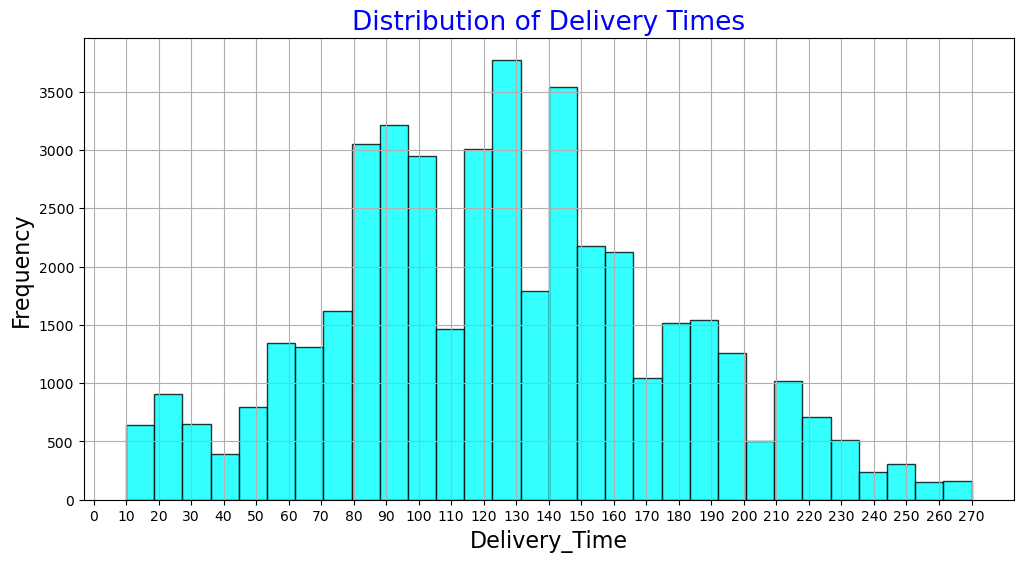

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26300\3119309004.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category",y="Delivery_Time", data=df2, palette='muted', estimator='mean')


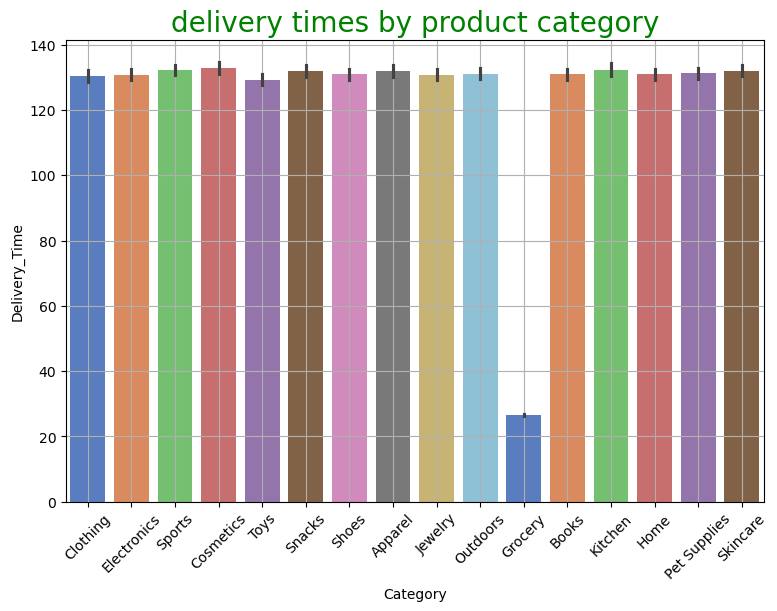

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26300\3119309004.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather",y="Delivery_Time", data=df2, palette='Set2')


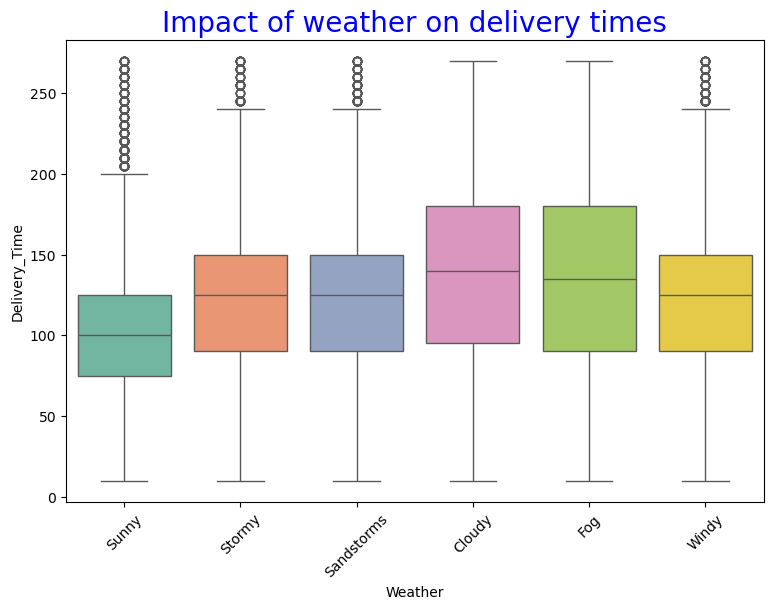

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26300\3119309004.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Traffic",y="Delivery_Time",data=df2, palette='Set2')


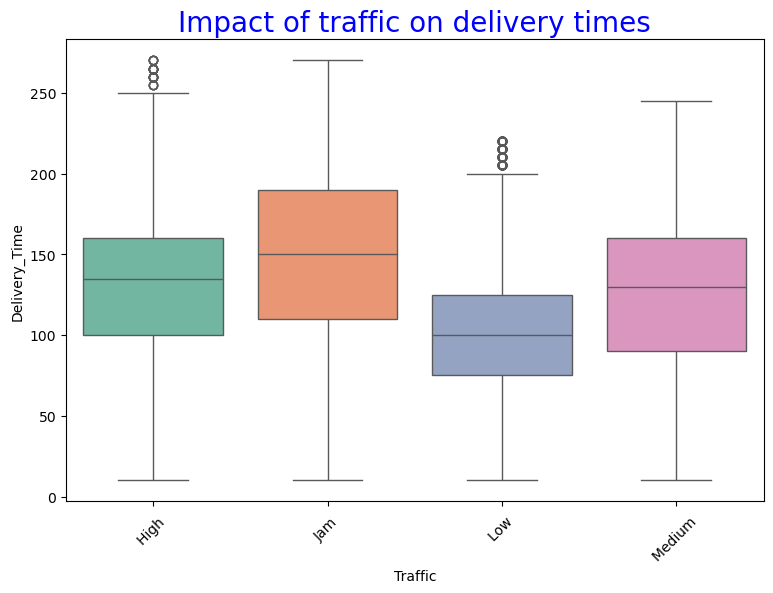

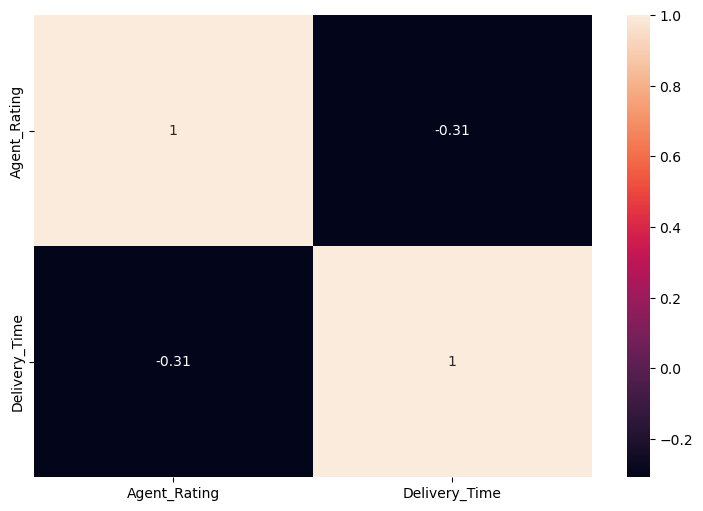

In [17]:
# Exploratory Data Analysis

#Histogram chart 

plt.figure(figsize=(12,6))
plt.hist(df.Delivery_Time,bins=30,edgecolor='k',color='cyan',alpha=.8)
plt.xticks(range(0,280,10))
plt.xlabel('Delivery_Time',size=16,color='black')
plt.ylabel('Frequency',size=16)
plt.title('Distribution of Delivery Times',size=19,color='blue')
plt.grid(True)
plt.show()

# Bar charts for delivery times by product category
plt.figure(figsize=(9,6))
sns.barplot(x="Category",y="Delivery_Time", data=df2, palette='muted', estimator='mean')
plt.title('delivery times by product category',size=20,color='green')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Impact of weather on delivery times.
plt.figure(figsize=(9,6))
sns.boxplot(x="Weather",y="Delivery_Time", data=df2, palette='Set2')
plt.title('Impact of weather on delivery times',size=20,color='blue')
plt.xticks(rotation=45)
plt.show()

# Impact of traffic on delivery times.
plt.figure(figsize=(9,6))
sns.boxplot(x="Traffic",y="Delivery_Time",data=df2, palette='Set2')
plt.title('Impact of traffic on delivery times',size=20,color='blue')
plt.xticks(rotation=45)
plt.show()


# Heatmaps to visualize correlations (e.g., agent rating and delivery time).
plt.figure(figsize=(9,6))
sns.heatmap(df2[['Agent_Rating','Delivery_Time']].corr(),annot=True)
plt.show()

In [18]:
df2

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Time,Pickup_Time,Weather,...,Delivery_Time,Category,Geo_Distance_km,Order_Timestamp,Order_Hour,Order_DayOfWeek,Order_Month,Is_Weekend,Order_Day,Order_Weekday
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,...,120,Clothing,3.020737,2022-03-19 11:30:00,11.0,5.0,3,1,19,5
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,...,165,Electronics,20.143737,2022-03-25 19:45:00,19.0,4.0,3,0,25,4
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,8:30:00,8:45:00,Sandstorms,...,130,Sports,1.549693,2022-03-19 08:30:00,8.0,5.0,3,1,19,5
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,...,105,Cosmetics,7.774497,2022-04-05 18:00:00,18.0,1.0,4,0,5,1
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,...,150,Toys,6.197898,2022-03-26 13:30:00,13.0,5.0,3,1,26,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,11:35:00,11:45:00,Windy,...,160,Home,1.488112,2022-03-24 11:35:00,11.0,3.0,3,0,24,3
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,19:55:00,20:10:00,Windy,...,180,Jewelry,10.983242,2022-02-16 19:55:00,19.0,2.0,2,0,16,2
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,23:50:00,0:05:00,Cloudy,...,80,Home,4.648024,2022-03-11 23:50:00,23.0,4.0,3,0,11,4
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,13:35:00,13:40:00,Cloudy,...,130,Kitchen,6.219668,2022-03-07 13:35:00,13.0,0.0,3,0,7,0


In [22]:
#save cleaned data into new name
df2="C:/labmentix/4th project/clean_data.csv"
df.to_csv(df2, index=False)

In [24]:
# Load cleaned data set
df2=pd.read_csv("C:/labmentix/4th project/clean_data.csv")

# Standardize Categorical Variable
df['Weather']= df['Weather'].str.lower().str.strip()
df['Traffic']=df['Traffic'].str.lower().str.strip()


In [7]:
#4.	Feature Engineering:
	#Calculate geospatial distances using store and drop coordinates.
        
from geopy.distance import geodesic

# Example: apply row-wise
def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_coords, drop_coords).km

df['Geo_Distance_km'] = df.apply(calculate_distance, axis=1)
print(df['Geo_Distance_km'])

0         3.020737
1        20.143737
2         1.549693
3         7.774497
4         6.197898
           ...    
43734     1.488112
43735    10.983242
43736     4.648024
43737     6.219668
43738    12.057294
Name: Geo_Distance_km, Length: 43739, dtype: float64


In [8]:
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'], errors='coerce')

In [9]:
#Time-Based Feature Extraction
# Convert to datetime
df['Order_Timestamp'] = pd.to_datetime(df['Order_Timestamp'], errors='coerce')

# Extract features
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df['Order_DayOfWeek'] = df['Order_Timestamp'].dt.dayofweek  # Monday=0
df['Order_Month'] = df['Order_Timestamp'].dt.month
df['Is_Weekend'] = df['Order_DayOfWeek'].isin([5, 6]).astype(int)

In [ ]:
# Before train-test split
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Extract features
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_DayofWeek'] = df['Order_Date'].dt.ofweek
df['Order_Hour'] = pd.to_datetime(df['Order_Time']).dt.hour

# Drop original date if not needed
df = df.drop('Order_Date', axis=1)

# Then split
X = df.drop('Delivery_Time', axis=1)
y = df['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(['Order_ID', 'Delivery_Date'], axis=1, errors='ignore')
X_test = X_test.drop(['Order_ID', 'Delivery_Date'], axis=1, errors='ignore')

X_train['Order_Date'] = pd.to_datetime(X_train['Order_Date'], errors='coerce')
X_test['Order_Date'] = pd.to_datetime(X_test['Order_Date'], errors='coerce')

X_train['Order_DayofWeek'] = X_train['Order_Date'].dt.ofweek
X_test['Order_Hour'] = X_test['Order_Time'].dt.hour

X_train = X_train.drop('Order_Date', axis=1)
X_test = X_test.drop('Order_Date', axis=1)

In [ ]:
# Regression model

Features=['Distance_km','Agent_Age', 'Agent_Rating', 'Order_DayofWeek', 'Order_Hour']
X=df[Features]
Y=df['Delivery_Time']

# Intialize Models

Models={ 
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_State=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_State=42)
    
}

Result= {}


In [ ]:
# ML Flow

for name,model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train,Y_train)
        predict=model.predict(X_test)

        rmse=np.sqrt(mean_square_error(Y_test, predict))
        mae=mean_absolute_error(Y_test, predict)
        r2=r2_score(Y_test, predict)


        mlflow.log_param("Model", name)
        mlflow.log_matric("RMSE", rmse)
        mlflow.log_matric("MAE", mae)
        mlflow.log_matric("R2", r2)

        mlflow.sklearn.log_model(model, name)
        



In [ ]:
# App title
st.title("Delivery Time Predictor")

# Sidebar inputs
st.sidebar.header("Enter Order Details")

# Input fields
distance_km = st.sidebar.slider("Distance (km)", min_value=1, max_value=100, value=10)
traffic = st.sidebar.selectbox("Traffic Level", ["Low", "Medium", "High"])
weather = st.sidebar.selectbox("Weather Condition", ["Clear", "Rainy", "Stormy", "Snowy"])
order_time = st.sidebar.time_input("Order Time", value=datetime.time(12, 0))

# Base delivery time estimate (in minutes)
base_time = distance_km * 2  # 2 minutes per km

# Traffic adjustment
traffic_factor = {"Low": 1.0, "Medium": 1.2, "High": 1.5}
base_time *= traffic_factor[traffic]

# Weather adjustment
weather_factor = {"Clear": 1.0, "Rainy": 1.1, "Stormy": 1.3, "Snowy": 1.4}
base_time *= weather_factor[weather]

# Final prediction
predicted_minutes = int(base_time)
predicted_delivery_time = (datetime.datetime.combine(datetime.date.today(), order_time) +
                           datetime.timedelta(minutes=predicted_minutes)).time()
# Display results
st.subheader("Predicted Delivery Time")
st.write(f"Estimated delivery time: **{predicted_delivery_time.strftime('%I:%M %p')}**")
st.write(f"Total estimated duration: **{predicted_minutes} minutes**")

Conclusion:-
-----------
           After building and testing the predictive model we were able to estimate delivery times with reasonable accuracy using features such as oreder details,shipping distance,product category,and seasonal factors. The models prdications demonstrate that delivery time can be effectively forecasted.which can help in:
           > Enhancing customer experiences
           > Improving operational efficiency 
           > Reducing delays

           This project confirms that data driven predictions can be a valuable tool for amazon to optimize its delivery process and maintain high serive quality.